In [106]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [107]:
df = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

In [108]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [109]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

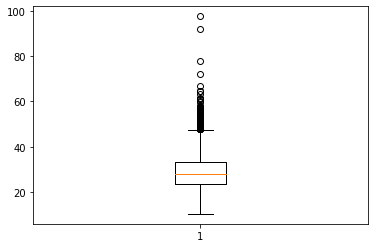

In [110]:
import matplotlib.pyplot as plt
A=df['bmi']
Anan=A[~np.isnan(A)] # Remove the NaNs
plt.boxplot(Anan);

In [111]:
df_bmi_50 = df[df['bmi'] < 50]
df_bmi_50.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [112]:
df['bmi'].fillna(df_bmi_50['bmi'].mean(), inplace=True)

In [113]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [114]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [115]:
# Unbalanced dataset
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [116]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

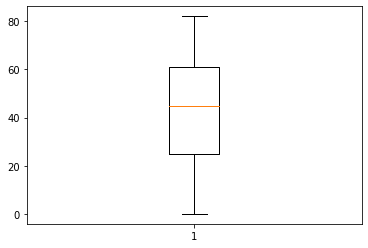

In [117]:
import matplotlib.pyplot as plt
plt.boxplot(df['age']);

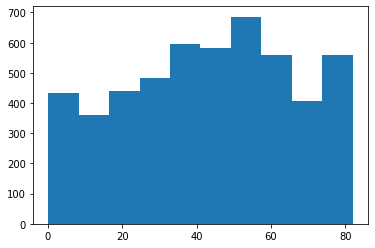

In [118]:
plt.hist(df['age']);

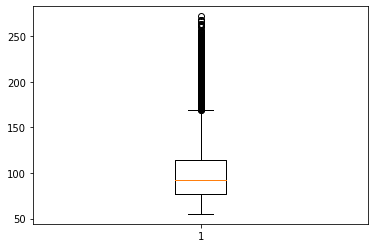

In [119]:
plt.boxplot(df['avg_glucose_level']);

In [120]:
df[df['avg_glucose_level'] == max(df['avg_glucose_level'])]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
193,69112,Male,68.0,1,1,Yes,Private,Rural,271.74,31.1,smokes,1


In [121]:
df1 = df.copy()

In [122]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
cols = ['gender','ever_married','work_type','Residence_type','smoking_status']
for i in cols:
    df1[i] = label_encoder.fit_transform(df1[i])

In [ ]:
df1.head()

In [ ]:
from sklearn.feature_selection import chi2

X = df1.drop(['stroke','id','age','avg_glucose_level','bmi'],axis=1)
y = df1['stroke']

In [ ]:
chi_scores = chi2(X,y)

In [ ]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

In [ ]:
p_values.plot.bar()

In [ ]:
df.head()

In [123]:
from sklearn import preprocessing
cols = ['ever_married','work_type','Residence_type','smoking_status']
df2 = pd.get_dummies(df, columns=['ever_married','work_type','Residence_type','smoking_status'])

In [124]:
df2.head()

,id,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,228.69,36.600000,1,0,1,...,0,1,0,0,0,1,0,1,0,0
1,51676,Female,61.0,0,0,202.21,28.444576,1,0,1,...,0,0,1,0,1,0,0,0,1,0
2,31112,Male,80.0,0,1,105.92,32.500000,1,0,1,...,0,1,0,0,1,0,0,0,1,0
3,60182,Female,49.0,0,0,171.23,34.400000,1,0,1,...,0,1,0,0,0,1,0,0,0,1
4,1665,Female,79.0,1,0,174.12,24.000000,1,0,1,...,0,0,1,0,1,0,0,0,1,0


In [125]:
df2.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease',
       'avg_glucose_level', 'bmi', 'stroke', 'ever_married_No',
       'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [126]:
X = df2[['age', 'hypertension', 'heart_disease',
       'avg_glucose_level', 'bmi', 'stroke', 'ever_married_No','work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes']]
y = df2['stroke']

# Class rebalancing strategies

In [127]:
df2.head()

,id,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,228.69,36.600000,1,0,1,...,0,1,0,0,0,1,0,1,0,0
1,51676,Female,61.0,0,0,202.21,28.444576,1,0,1,...,0,0,1,0,1,0,0,0,1,0
2,31112,Male,80.0,0,1,105.92,32.500000,1,0,1,...,0,1,0,0,1,0,0,0,1,0
3,60182,Female,49.0,0,0,171.23,34.400000,1,0,1,...,0,1,0,0,0,1,0,0,0,1
4,1665,Female,79.0,1,0,174.12,24.000000,1,0,1,...,0,0,1,0,1,0,0,0,1,0


In [128]:
X = df2.drop(['stroke','id','gender'], axis=1).values

In [129]:
y = df['stroke'].values

In [130]:
print('Shape of Feature Matrix:', X.shape)
print('Shape of Target Vector:', y.shape)

Shape of Feature Matrix: (5110, 18)
Shape of Target Vector: (5110,)


In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.20, random_state=42)

In [132]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_sm, y_train_sm = oversample.fit_resample(X_train, y_train)

In [134]:
sum(y_train_sm == 0)

3901

In [135]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0, class_weight='balanced')
clf.fit(X_train_sm, y_train_sm)

RandomForestClassifier(class_weight='balanced', random_state=0)

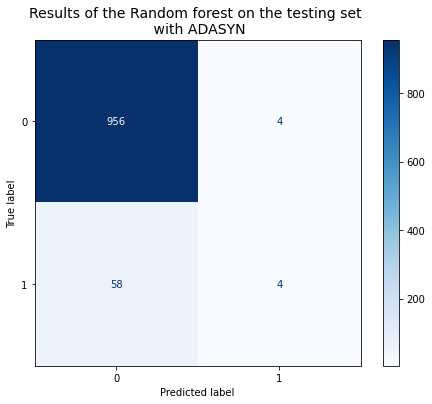

In [138]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp=plot_confusion_matrix(clf,X_test, y_test
                           , cmap=plt.cm.Blues, ax=ax)
disp.ax_.set_title("Results of the Random forest on the testing set \n with ADASYN",size=14)
plt.show()

In [136]:
y_pred = clf.predict(X_test)

In [137]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.50      0.06      0.11        62

    accuracy                           0.94      1022
   macro avg       0.72      0.53      0.54      1022
weighted avg       0.92      0.94      0.92      1022



In [141]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train_sm, y_train_sm)
Y_pred = clf.predict(X_test)
#sns.heatmap(confusion_matrix(y_test, Y_pred),annot=True,fmt='d',cmap='Blues')
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.72      0.83       960
           1       0.15      0.77      0.25        62

    accuracy                           0.73      1022
   macro avg       0.57      0.75      0.54      1022
weighted avg       0.93      0.73      0.80      1022

